# Creacion de la mascara que sera usada para ubicar la provincia seleccionada

In [1]:
import rasterio as rio
from rasterio.transform import from_origin
from rasterio.transform import xy
from rasterio import plot as rioplt
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
%matplotlib inline

### Lectura de los archivos  con informacion geografica

In [2]:
# Provincia Seleccionada
shapeRegS = gpd.read_file("../shapefileOutput/regionSeleccionada/REGS.shp")

### Creacion de una nueva banda que contendra la mascara

In [3]:
newBand = np.zeros((2500, 3500), dtype='uint16')
print(newBand)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Creacion del transform para la nueva mascara

In [4]:
newTransform = from_origin(531585, -1434975, 30, 30)
print(newTransform)

| 30.00, 0.00, 531585.00|
| 0.00,-30.00,-1434975.00|
| 0.00, 0.00, 1.00|


### Obtencion de las coordenada del punto medio del pixel inicial

In [5]:
oeste, norte = xy(newTransform, 0, 0)
print(oeste)
print(norte)

531600.0
-1434990.0


### Construcción de la mascara, este proceso demora como dos horas

In [6]:
#aux =  shapeRegS.unary_union
#for i in range(2500):
#	print(i)
#	oeste_2 = oeste
#	for j in range(3500):
#		p1 = gpd.geoseries.Point(oeste_2, norte)
#		if p1.intersects(aux):
#			newBand[i, j] = 255
#		oeste_2 = oeste_2 + 30
#	norte = norte - 30

### Guardo la mascara en un nuevo archivo tiff

In [7]:
#new_src = rio.open(
#    '../imageOutput/mask.tif',
#    'w',
#    driver='GTiff',
#    height=2500,
#    width=3500,
#    count=1,
#    dtype='uint16',
#    crs='EPSG:32618',
#    transform=newTransform,
#)
#new_src.write(newBand, 1)
#new_src.close()

### Grafico las mascara

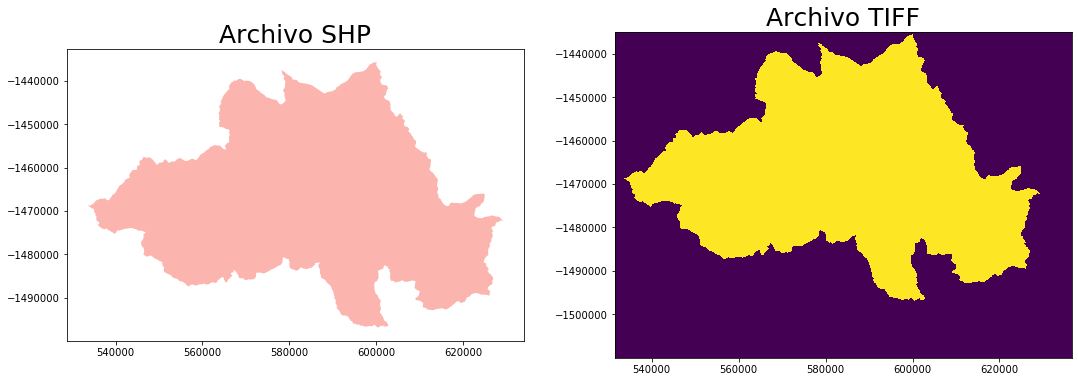

In [8]:
src_2 = rio.open('../imageOutput/mask.tif')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 18))
ax1.set_title('Archivo SHP', fontsize=25)
shapeRegS.plot(ax=ax1, cmap = 'Pastel1')
ax2.set_title('Archivo TIFF', fontsize=25)
rioplt.show(src_2, ax=ax2)
plt.show()